In [1]:
# Wczytanie danych
import pandas as pd
df = pd.read_csv('caesarian.csv', sep=',', header=0)
df.head()

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [2]:
# Podział danych
X = df.iloc[:, 0:5]
Y = df.iloc[:, 5]

In [3]:
# Przygotowanie danych (zamiana liczby na tekst)

delivery_time_map={
    0:'timely',
    1:'premature',
    2:'latecomer'
}
X['delivery time 2']= X['Delivery time'].map(delivery_time_map)
X = X.drop(['Delivery time'], axis=1)
X.head()

,Age,Delivery number,Blood of Pressure,Heart Problem,delivery time 2
0,22,1,2,0,timely
1,26,2,1,0,timely
2,26,2,1,0,premature
3,28,1,2,0,timely
4,22,2,1,0,timely


In [4]:
# Stworzenie dammis i usunicie zmiennej zależnej
X = pd.get_dummies(X)
X = X.drop(['delivery time 2_timely'], axis=1)
X.head()

,Age,Delivery number,Blood of Pressure,Heart Problem,delivery time 2_latecomer,delivery time 2_premature
0,22,1,2,0,0,0
1,26,2,1,0,0,0
2,26,2,1,0,0,1
3,28,1,2,0,0,0
4,22,2,1,0,0,0


In [5]:
# Podział dane na testowe i treningowe
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, Y)

In [10]:
# Przygotowanie i trenowanie modelu SVC
from sklearn import svm
model = svm.SVC(gamma=1).fit(X_train, y_train)
# Wynik
model.score(X_test, y_test)

0.65

## Sprawdzenie krzywerj ROC

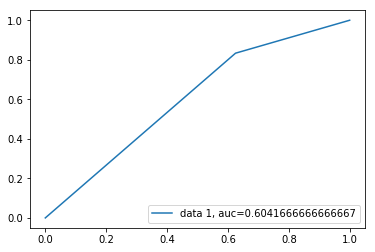

In [11]:
import matplotlib.pyplot as plt
from sklearn import metrics

y_pred_prob = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label ="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# K-krotna walidacja krzyżowa

In [8]:
from sklearn.model_selection import cross_val_score

model = svm.SVC(gamma = 'auto')

scores = cross_val_score(model, X, Y, cv=15)

scores.mean()

0.6419047619047619